## Build a model from CLI

In this example a simple **SFINCS** compound flood model will be made, using **HydroMT**'s yml-file that allows for fast model configuration. The model is situated in **Northern Italy**, where a small selection of topography and bathymetry data has already been made available for you to try the examples.

In [1]:
# To check the version of hydromt and the hydromt_sfincs plugin, run the following command in a terminal:
!hydromt --models

model plugins:
 - sfincs (hydromt_sfincs 1.2.0)
generic models (hydromt 0.10.1):
 - grid_model
 - vector_model
 - mesh_model
 - network_model



This example shows how to build a simple SFINCS model on a regular grid, containing an elevation dep-file, offshore water level forcing and an upstream discharge input forcing.
For making a more advanced model including e.g. spatially varying infiltration and roughness, see the example notebook: examples/build_from_script.ipynb

In case you want to adjust this example to build a SFINCS model anywhere else in the world, you will have to add your own datasets to HydroMT's data catalog. For more info on that, check-out:

- [Prepare data catalog](https://deltares.github.io/hydromt/latest/user_guide/data_prepare_cat.html)

- [Example: Prepare data catalog](https://deltares.github.io/hydromt/latest/_examples/prep_data_catalog.html)

- [Example: Datasources](example_datasources.ipynb)

**Steps followed in this notebook to build your SFINCS model:**
<ol> 
<li> Build your first SFINCS model </li>
<li> Check what files have been created </li>
<li> Information about created files </li>
<li> Plot current base model </li>
<li> Explanation of HydroMT's .yml-file </li>
<li> Make new model including forcing </li>
<li> Plot model including forcing </li>
<li> Check what additional files have been created </li>
</ol> 

Let's get started!

### 1. Build your first SFINCS model:

In [2]:
root = r"./indus_sfincs_model"

In [3]:
!hydromt build sfincs indus_sfincs_model --region "{'geom': 'data/region.geojson'}" -i sfincs_base_build.yml -d /home/hadi/Downloads/indus-data/data_catalog.yml  --force-overwrite -v

2025-05-10 13:48:48,277 - build - log - INFO - HydroMT version: 0.10.1
2025-05-10 13:48:48,277 - build - main - INFO - Building instance of sfincs model at /home/hadi/hydromt_sfincs-1.2.0/examples/indus_sfincs_model.
2025-05-10 13:48:48,277 - build - main - INFO - User settings:
2025-05-10 13:48:48,423 - build - data_catalog - INFO - Parsing data catalog from /home/hadi/Downloads/indus-data/data_catalog.yml
2025-05-10 13:48:48,433 - build - model_api - INFO - Initializing sfincs model from hydromt_sfincs (v1.2.0).
2025-05-10 13:48:48,434 - build - model_api - INFO - setup_grid_from_region.region: {'geom': 'data/region.geojson'}
2025-05-10 13:48:48,434 - build - model_api - INFO - setup_grid_from_region.res: 250
2025-05-10 13:48:48,434 - build - model_api - INFO - setup_grid_from_region.crs: utm
2025-05-10 13:48:48,434 - build - model_api - INFO - setup_grid_from_region.rotated: True
2025-05-10 13:48:48,434 - build - model_api - INFO - setup_grid_from_region.hydrography_fn: None
2025-05

**Explanation of what is provided:**

* `!` : the '!' is added so you can run the command line interface (CLI) from a python notebook
* `hydromt build sfincs` : HydroMT should build a SFINCS model, 
* `tmp_sfincs_base` : HydroMT should build the model in a folder called "tmp_sfincs_base" relative to the current working directory (you can also provide absolute paths)
* `--region "{'geom': 'data/region.geojson'}"` : the area of interest for which a model is created is based on a geometry, which is already defined for you in the file "data/region.geojson"
* `-i sfincs_base_build.yml` : model configuration which describes the complete pipeline to build your model, more on that later
* `--force-overwrite` :  even if there's already an existing folder with the same name and SFINCS input files, HydroMT will overwrite it
* `-v` : add verbosity to the logger

**NOTE:**

- instead of `--region`, you can also type `-r`
- instead of `--force-overwrite`, you can also type `--fo`
- for extra output information of HydroMT's logfile command, add `-v`

In [4]:
# For more information on command line available options, type:
!hydromt build --help

Usage: hydromt build [OPTIONS] MODEL MODEL_ROOT

  Build models from scratch.

  Example usage: --------------

  To build a wflow model for a subbasin using a point coordinates snapped to
  cells with upstream area >= 50 km2 hydromt build wflow /path/to/model_root
  -i /path/to/wflow_config.yml  -r "{'subbasin': [-7.24, 62.09], 'uparea':
  50}" -d deltares_data -d /path/to/data_catalog.yml -v

  To build a sfincs model based on a bbox hydromt build sfincs
  /path/to/model_root  -i /path/to/sfincs_config.yml  -r "{'bbox':
  [4.6891,52.9750,4.9576,53.1994]}"  -d /path/to/data_catalog.yml -v

Options:
  --opt TEXT               Method specific keyword arguments, see the method
                           documentation of the specific model for more
                           information about the arguments.
  -i, --config PATH        Path to hydroMT configuration file, for the model
                           specific implementation.
  -r, --region TEXT        Set the region for which to 

### 2. Check what files have been created:

In [5]:
import os

dir_list = os.listdir(root)
print(dir_list)

['gis', 'sfincs.dep', 'hydromt.log', 'sfincs.inp', 'sfincs.msk', 'sfincs.ind']


### 3. Information about created files:

**SFINCS native input files:**

* `SFINCS configuration`: sfincs.inp ([Read more](https://sfincs.readthedocs.io/en/latest/input.html#overview))  
    - which includes the grid definition ([Read more](https://sfincs.readthedocs.io/en/latest/input.html#grid-characteristics))
* `depfile`: sfincs.dep ([Read more](https://sfincs.readthedocs.io/en/latest/input.html#depth-file))
* `mskfile`: sfincs.msk ([Read more](https://sfincs.readthedocs.io/en/latest/input.html#mask-file))
* `indfile`: sfincs.ind ([Read more](https://sfincs.readthedocs.io/en/latest/input.html#index-file))

Check-out the SFINCS manual (see links) in case you want to have more information about each file

**HydroMT output:**

* `folder 'gis'` : contains tiff- and geojson-files of the input files of SFINCS, for you to easily check in your favourite GIS application
* `folder 'subgrid'` : contains tiff-files of the subgrid input which can be used for downscaling later
* `hydromt.log` : log-file with feedback of HydroMT during building your model


### 4. Plot current base model

In [6]:
from hydromt_sfincs import SfincsModel
# read the model with hydromt methods
sf = SfincsModel(root=root, mode="r")
sf.read()

Here in the plot you see the following:
- Background geoimage of the region
- Spatial colourplot of the elevation (dep)
- In the red line of 'waterlevel bnd' the boundary cells along which SFINCS will later force input water levels

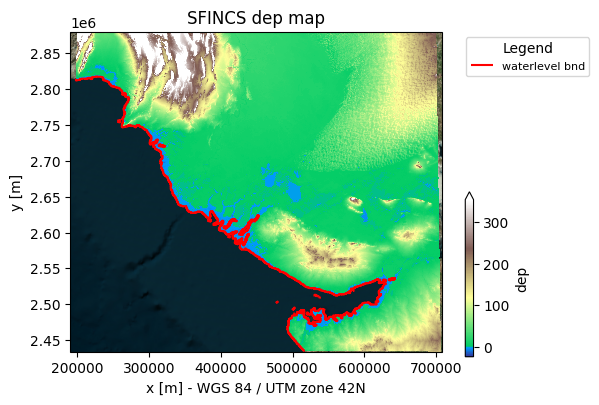

In [24]:
# plot the model with satelite basemap (see hydromt_sfincs.plot_basemap for more options)
_ = sf.plot_basemap(shaded=False, bmap="sat", zoomlevel=12)

### 5. Explanation of HydroMT's .yml-file:

This model was made using HydroMT's yaml-file, in this case ***'sfincs_base_build.yml'***, that contains:

In [7]:
fn = "sfincs_base_build.yml"
with open(fn, "r") as f:
    txt = f.read()
print(txt)

global:
  data_libs: []                # add optional paths to data_catalog yml files

setup_config:
  tref: 20220827 000000
  tstart: 20220827 000000
  tstop: 20220830 000000

setup_grid_from_region:
  res: 250                      # model resolution
  crs: utm                     # model CRS (must be UTM zone)
  rotated: True                # allow a rotated grid

setup_dep:
  datasets_dep:
  - elevtn: merit_hydro        # 1st elevation dataset
    zmin: 0.001                # only use where values > 0.001
  - elevtn: gebco              # 2nd eleveation dataset (to be merged with the first)

setup_mask_active:
  mask: data//region.geojson   # Note that this is local data and only valid for this example
  zmin: -5                     # set cells below zmin to inactive

setup_mask_bounds:
  btype: waterlevel            # Set waterlevel boundaries
  zmax: -1 # only cells below zmax can be waterlevel boundaries
  
#setup_subgrid:
#  datasets_dep:
#  - elevtn: merit_hydro             # 1s

In [8]:
# in case you want to see how hydromt interprets the config file, you can use the following:
from hydromt.config import configread

config = configread(fn)
config

{'global': {'data_libs': []},
 'setup_config': {'tref': '20220827 000000',
  'tstart': '20220827 000000',
  'tstop': '20220830 000000'},
 'setup_grid_from_region': {'res': 250, 'crs': 'utm', 'rotated': True},
 'setup_dep': {'datasets_dep': [{'elevtn': 'merit_hydro', 'zmin': 0.001},
   {'elevtn': 'gebco'}]},
 'setup_mask_active': {'mask': 'data//region.geojson', 'zmin': -5},
 'setup_mask_bounds': {'btype': 'waterlevel', 'zmax': -1}}

**You can see the following sections:**

* `setup_config`: arguments are forwarded to the SFINCS model configuration file sfincs.inp, in this case the reference time 'tref', model start time 'tstart' and end time 'tstop'
* `setup_grid_from_region`: used to create a model grid covering the region you provided; 
    <ul>
    <li>using a grid resolution of 50 meters (res = 50) </li>
    <li>using the closest UTM zone (crs = utm) to the model domain as the Coordinate Reference System (also a specific CRS or epsg-code can be provided) </li>
    <li>using a rotation that results in a minimum rectangle around your region (if rotation=True)</li>
    </ul>
* `setup_dep`: adds topography and bathymetry data to the model domain. If using local data sources, these should be described in a `data_catalog.yml`. At least one dataset is required. 
    <ul><li>Additional data sources are merged with the first elevation dataset using merge argements (e.g. zmin, zmax, offset, mask) if provided. </li></ul>
* `setup_mask_active`: set valid model cells based on an input region file (more options available).
* `setup_mask_bounds`: set cells at the model domain edge with a maxmimum elevation of -5 meters (zmax = -5) to waterlevel boundary cells.

From here on, we're going to extend the model with some forcing of water level and river discharge, so that actually something interesting will happen when you run the created SFINCS model later. Also, we're adding some observations points so we can inspect this. We do this with the additional yml-file  ***sfincs_base_update.yml*** containing what we want to add:

In [9]:
!hydromt update  --help

Usage: hydromt update [OPTIONS] MODEL MODEL_ROOT

  Update a specific component of a model.

  Set an output directory to copy the edited model to a new folder, otherwise
  maps are overwritten.

  Example usage: --------------

  Update (overwrite!) landuse-landcover based maps in a Wflow model: hydromt
  update wflow /path/to/model_root -c setup_lulcmaps --opt lulc_fn=vito -d
  /path/to/data_catalog.yml -v

  Update Wflow model components outlined in an .yml configuration file and
  write the model to a directory: hydromt update wflow /path/to/model_root  -o
  /path/to/model_out  -i /path/to/wflow_config.yml  -d
  /path/to/data_catalog.yml -v

Options:
  -o, --model-out DIRECTORY  Output model folder. Maps in MODEL_ROOT are
                             overwritten if left empty.
  -i, --config PATH          Path to hydroMT configuration file, for the model
                             specific implementation.
  -c, --components TEXT      Model methods from configuration file to run
 

### 6. Update the model to include forcing:

In [10]:
!hydromt update sfincs indus_sfincs_model -i sfincs_base_update.yml -d /home/hadi/Downloads/indus-data/data_catalog.yml -v

2025-05-10 13:50:40,755 - update - log - INFO - HydroMT version: 0.10.1
2025-05-10 13:50:40,755 - update - main - INFO - Updating sfincs model at /home/hadi/hydromt_sfincs-1.2.0/examples/indus_sfincs_model (r+).
2025-05-10 13:50:40,755 - update - main - INFO - Output dir: /home/hadi/hydromt_sfincs-1.2.0/examples/indus_sfincs_model
2025-05-10 13:50:40,755 - update - main - INFO - User settings:
2025-05-10 13:50:40,895 - update - data_catalog - INFO - Parsing data catalog from /home/hadi/Downloads/indus-data/data_catalog.yml
2025-05-10 13:50:40,907 - update - model_api - WARNING - Model dir already exists and files might be overwritten: /home/hadi/hydromt_sfincs-1.2.0/examples/indus_sfincs_model/gis.
2025-05-10 13:50:40,907 - update - model_api - INFO - Initializing sfincs model from hydromt_sfincs (v1.2.0).
2025-05-10 13:50:40,921 - update - model_api - INFO - setup_observation_lines.locations: /home/hadi/hydromt_sfincs-1.2.0/examples/data/compound_example_observation_lines.geojson
2025

The example above means the following: run **hydromt** with:

- `update sfincs`: i.e. update a SFINCS model.
- `tmp_sfincs_base`: original model folder. Here we update the model inplace. Add `-o <output folder>` to store the udpated model in another directory.
- `-i sfincs_base_update.yml`: configuration file containing the components to update and their different options.

In [11]:
# Let's see what is in the yml-file:

fn = "sfincs_base_update.yml"
with open(fn, "r") as f:
    txt = f.read()
print(txt)

setup_observation_lines:
    locations: data//compound_example_observation_lines.geojson 
setup_observation_points:
  locations: data//compound_example_observation_points.geojson       # Note that this is local data and only valid for this example

setup_waterlevel_forcing:
  geodataset: gtsm_era5
  buffer: 2000                                                        # [m] find points within 2 km of waterlevel boundary

setup_discharge_forcing:
  timeseries: data//compound_dis_timeseries.csv
  locations: data//compound_src_locations.geojson                     # Note that this is local data and only valid for this example
setup_manning_roughness:
    
setup_precip_forcing_from_grid:
  precip: era5_precip
 
setup_wind_forcing_from_grid:
  wind: era5_wind

setup_pressure_forcing_from_grid:
  press: era5_msl
setup_cn_infiltration:
    cn: gcn250
    antecedent_moisture: wet
    
#setup_river_inflow:
#    hydrography: merit_hydro

setup_river_outflow:
    hydrography: merit_hydro
       
  

**You can see the following sections:**

* `setup_observation_points`: add 3 observation points based on the locations given in the shapefile *"data//compound_example_observation_points.shp"*
* `setup_waterlevel_forcing`: add water level forcing, in this case water levels from a GTSM run, with 4 output points found in the SFINCS model domain. Timeseries are clipped automatically to the earlier provided start and stop time of the SFINCS model (in setup_config)
* `setup_discharge_forcing`:  add an upstream river discharge input point, in this case from a csv file (timeseries) and a geojson (locations)

### 7. Plot model including forcing:

In [12]:
from hydromt_sfincs import SfincsModel

# read the model with hydromt methods
sf = SfincsModel(root=root, mode="r")
sf.read()

Index in bndfile does not match /home/hadi/hydromt_sfincs-1.2.0/examples/indus_sfincs_model/gis/bnd.geojson
Index in bndfile does not match /home/hadi/hydromt_sfincs-1.2.0/examples/indus_sfincs_model/gis/bnd.geojson
Index in srcfile does not match /home/hadi/hydromt_sfincs-1.2.0/examples/indus_sfincs_model/gis/src.geojson


**In the forcing plot you see the following:**

- Water level time-series based on GTSM input for the model period. For each of the 4 stations within the SFINCS domain,
  these time-series are interpolated to the 'waterlevel' boundary cells (bnd) using the two nearest stations.
- Discharge time series from the local file input. These timeseries are forced at the 'discharge src' points  



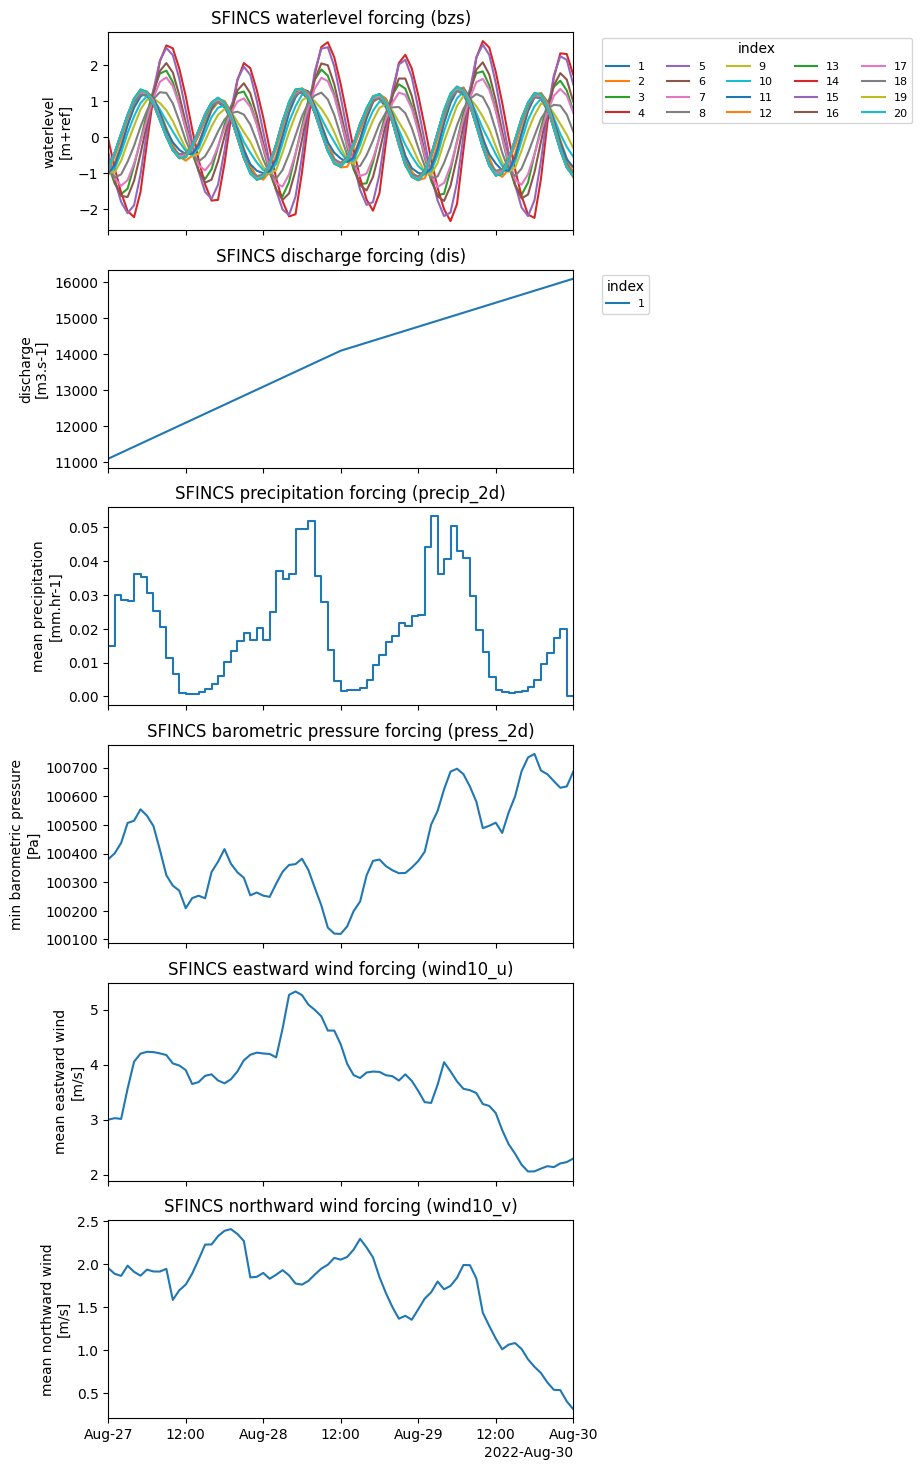

In [13]:
# Plot time-series:
_ = sf.plot_forcing(fn_out="forcing.png")

**In the basemap plot you see the following:**

- Background geoimage of the region
- Spatial colourplot of the elevation (dep)
- In the red line of 'waterlevel bnd' the boundary cells along which SFINCS will later force input water levels
- Specified observation points 'obs' in red diamond to get a 'sfincs_his.nc' output file
- Discharge 'src' and waterlevel 'bnd' point locations.

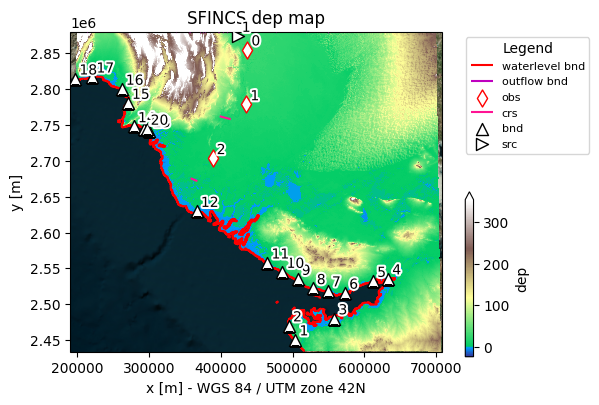

In [14]:
# plot the model basemaps
# Note the added obs and forcing points

_ = sf.plot_basemap(fn_out="basemap.png", bmap="sat", zoomlevel=12)

### 8. Check what additional files have been created:

In [39]:
dir_list = os.listdir(root)
print(dir_list)

['figs', 'wind_2d.nc', 'sfincs.msk', 'sfincs.bnd', 'sfincs.scs', 'sfincs.dep', 'sfincs.bzs', 'sfincs.obs', 'sfincs.inp', 'precip_2d.nc', 'gis', 'press_2d.nc', 'hydromt.log', 'sfincs.ind']


**SFINCS native input files:**

* `obsfile`: sfincs.obs ([Read more](https://sfincs.readthedocs.io/en/latest/input.html#observation-points))
* `bndfile`: sfincs.bnd ([Read more](https://sfincs.readthedocs.io/en/latest/input_forcing.html#water-level-points))
* `bzsfile`: sfincs.bzs ([Read more](https://sfincs.readthedocs.io/en/latest/input_forcing.html#water-level-time-series))
* `srcfile`: sfincs.src ([Read more](https://sfincs.readthedocs.io/en/latest/input_forcing.html#discharge-points))
* `disfile`: sfincs.dis ([Read more](https://sfincs.readthedocs.io/en/latest/input_forcing.html#discharge-time-series))

Click on **Read more** in case you want to have more information about what each file means!

In case you want to add other types of forcing, check-out:

- [SFINCS manual about input forcing](https://sfincs.readthedocs.io/en/latest/input_forcing.html)
- [Example: Forcing](example_forcing.ipynb)


Now you have made a model, you can progress to the notebooks: 
<ul>
<li> examples/run_sfincs_model.ipynb </li>
<li> examples/analyse_sfincs_model.ipynb </li>
</ul>

This notebook provides you a simple SFINCS model on a regular grid. A more advanced example is provided in see <i>examples/build_from_script.ipynb</i>. In addition, an overview of all available options in HydroMT-SFINCS can be found [here](https://deltares.github.io/hydromt_sfincs/latest/user_guide/sfincs.html). 

**NOTE:** HydroMT can build even more models for you, like the Hydrological model Wflow, 
to provide for instance upstream boundary conditions for your SFINCS model!
See e.g: https://deltares.github.io/hydromt/latest/plugins.html